<a href="https://colab.research.google.com/github/hnhyhj/Python-study/blob/master/9_Recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9
# Recursion

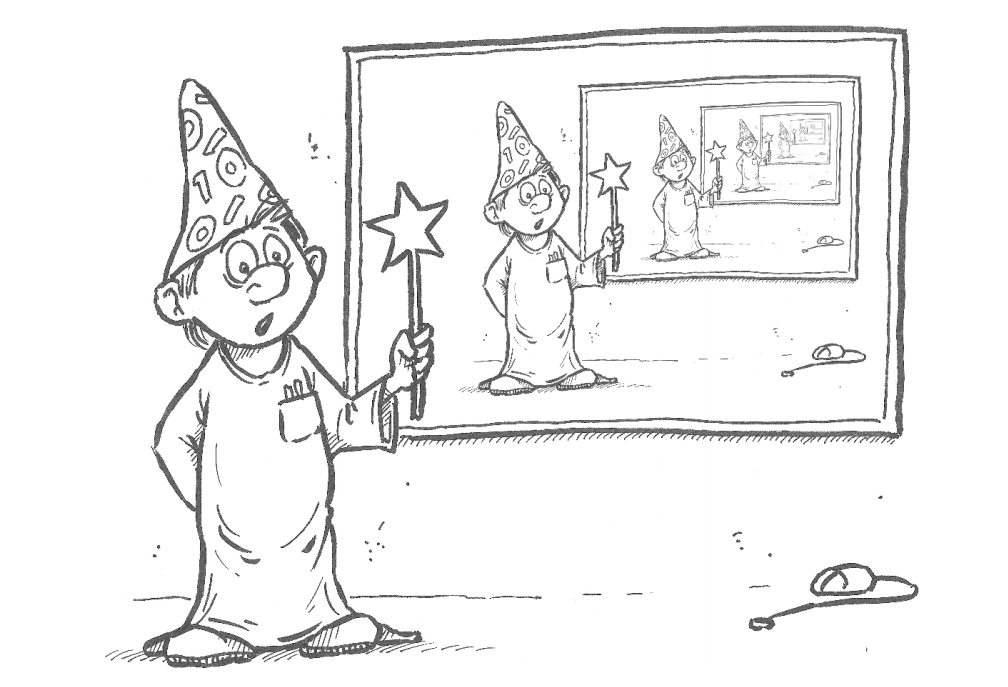

## 9.1 What is recursion?

Recursion is a technique whereby a function calls itself. In a bit more general sense, it is
when a function makes calls in such a way that the function itself is still being executed
while it gets called again (e.g., function a() calls function b(), which calls function a()
again).

This might sound weird when you first encounter it, but there is nothing against a function
calling other functions, and a function can call any function that has been defined by the
time that the call takes place. And since a function is defined by the time its code gets
executed, it can call itself.

“But,” one might say: “if a function calls itself, then it calls itself again, and again, and
again... Doesn’t that mean it gets into an endless process, similar to an endless loop?” The
answer is that there is certainly a danger, with sloppy coding, that a recursive function gets
into an endless loop, but recursive functions should be designed in such a way that that
does not happen.

There exist many problems for which recursion is the most elegant solution. Therefore it is
important that you are aware of the technique, and know how and when to apply it... and
its limitations.

## 9.2 Recursive definitions

This definition is recursive as it refers to the factorial of n − 1 to define the factorial of n.
This is not leading to an endless recursion, however, as at some point n will be 1, and the
factorial of 1 is defined separately.

In [ ]:
def factorial( n ):
    if n <= 1:
        return 1
    return n * factorial( n-1 )

print( factorial( 5 ) )

120


Notice how this function describes the recursive definition of the factorial exactly: if n is
1, it returns 1, and otherwise it returns n times the factorial of n-1. (Note that I wrote if
n <= 1 instead of n == 1 to avoid problems with the user calling the function with, for
instance, a negative n.)

### 9.2.1 When to use recursive implementations

Once you understand the recursive implementation of the factorial, it might look appealing. It is simple, elegant, and has a certain coolness factor. However, the iterative implementation of the factorial is highly preferable over the recursive one.

The reason is clear from the call descriptions above. You see that before the call to
factorial( 1 ) is made, four other calls to factorial( ) already reside in memory.
Should you wish to calculate the factorial of 100, no less than 100 calls to the function
will reside in memory before it can start returning values. This is not a good idea, and, in
fact, Python may easily run out of (stack) memory in such a case, or become really, really
slow.

Contrariwise, an iterative implementation of the factorial only needs to keep two variables
in memory. It is fast and there is no danger of crashing.
So you should only use recursive implementations if:
- recursion is the most natural way to implement the solution; and
- the recursive process is guaranteed not to go too deep.

Any recursive process can also be implemented as an iterative process. However, occasionally you can encounter problems for which the recursive solution is much more elegant,
readable, and maintainable than the iterative one. In that case, consider reverting to the
recursive solution.

## 9.3 The Towers of Hanoi

Three vertical pegs (henceforth “towers”) stand tall. We will label them A, B, and C.
Doughnut-shaped discs are around tower A. The widest disc is at the bottom, and we
will call it disc 1. The rest of the discs above disc 1 are labeled with increasing numerals and get progressively narrower. For instance, if we were to work with three discs,
the widest disc, the one on the bottom, would be 1. The next widest disc, disc 2, would
sit on top of disc 1. And finally, the narrowest disc, disc 3, would sit on top of disc 2.
Our goal is to move all of the discs from tower A to tower C given the following
constraints:
- Only one disc can be moved at a time.
- The topmost disc of any tower is the only one available for moving.
- A wider disc can never be atop a narrower disc.

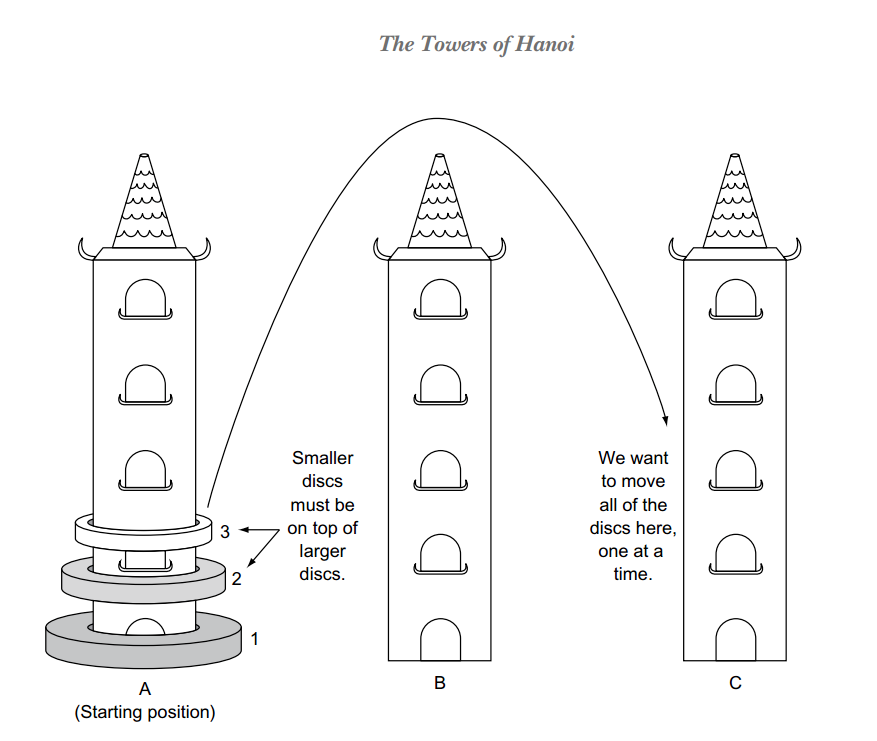

In [ ]:
num = int(input())

def hanoi(n):
    if n == 1:
        return 1
    return 2*hanoi(n-1) + 1
  
print(hanoi(num))

7
127


## 9.4 斐波那契数列

斐波那契数列（意大利语：Successione di Fibonacci），又译为菲波拿契数列、菲波那西数列、斐氏数列、黄金分割数列。

在数学上，斐波那契数列是以递归的方法来定义：

F(0) = 0

F(1) = 1

F(n)=F(n-1) + F(n-2)（n≧2）

用文字来说，就是斐波那契数列由0和1开始，之后的斐波那契数就是由之前的两数相加而得出。首几个斐波那契数是：

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233……

特别指出：0不是第一项，而是第零项。

### 9.4.1 暴力递归 (Brute Force)

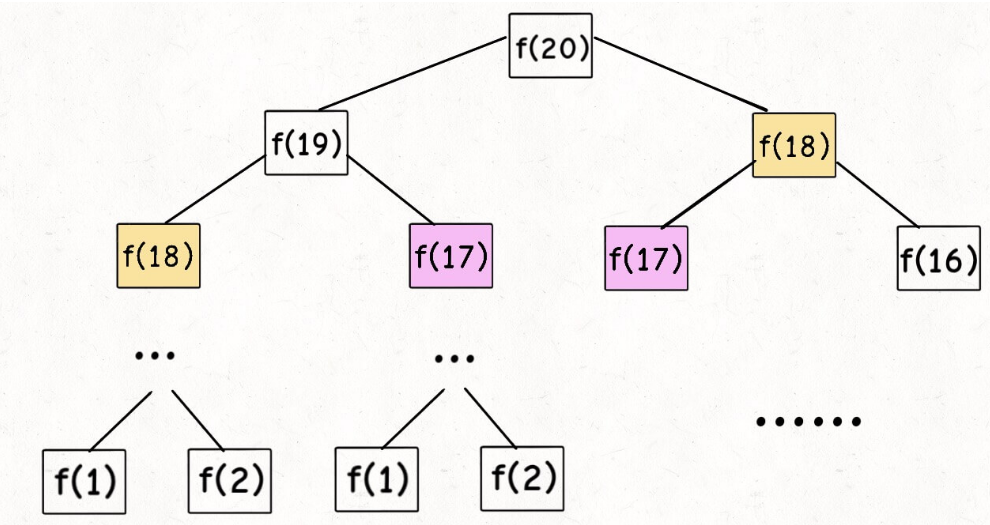

In [12]:
import time
start = time.time()
n = int(input())

def fib(num):
    if num == 1:
        return 1
    if num == 2:
        return 1
    
    return fib(num-1) + fib(num-2)

print(fib(n))

end = time.time()
print(f"{end-start} seconds")

35
9227465
7.596035480499268 seconds


### 9.4.2 带备忘录的递归（trim）

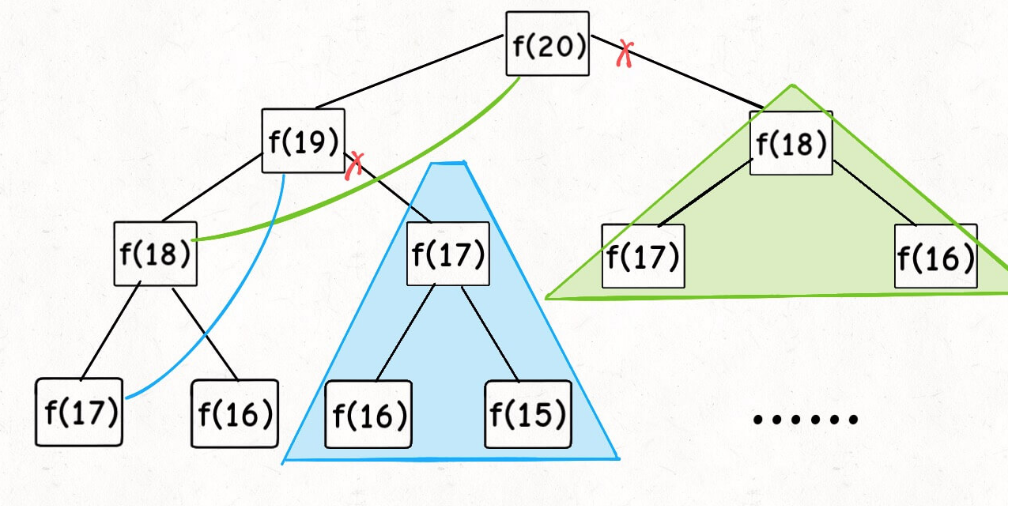

In [21]:
import time
start = time.time()

n = int(input())
memo = {}

def fib(num):
    if num == 1:
        return 1
    if num == 2:
        return 1
    if num in memo:
        return memo[num]
    
    fibo = fib(num-1) + fib(num-2)
    memo[num] = fibo

    return fibo

print(fib(n))

end = time.time()
print(f"{end-start} seconds")

80
23416728348467685
2.767183542251587 seconds



### 9.4.3 动态规划（DP table）


In [20]:
import time
start = time.time()

n = int(input())

dp_table = [0] * (n+1)
dp_table[0] = 0
dp_table[1] = 1
dp_table[2] = 1

for i in range(3, n+1):
    dp_table[i] = dp_table[i-1] + dp_table[i-2]

print(dp_table[n])

end = time.time()
print(f"{end-start} seconds")

80
23416728348467685
4.748827695846558 seconds


## 9.5 2015 J5: ***π-day***


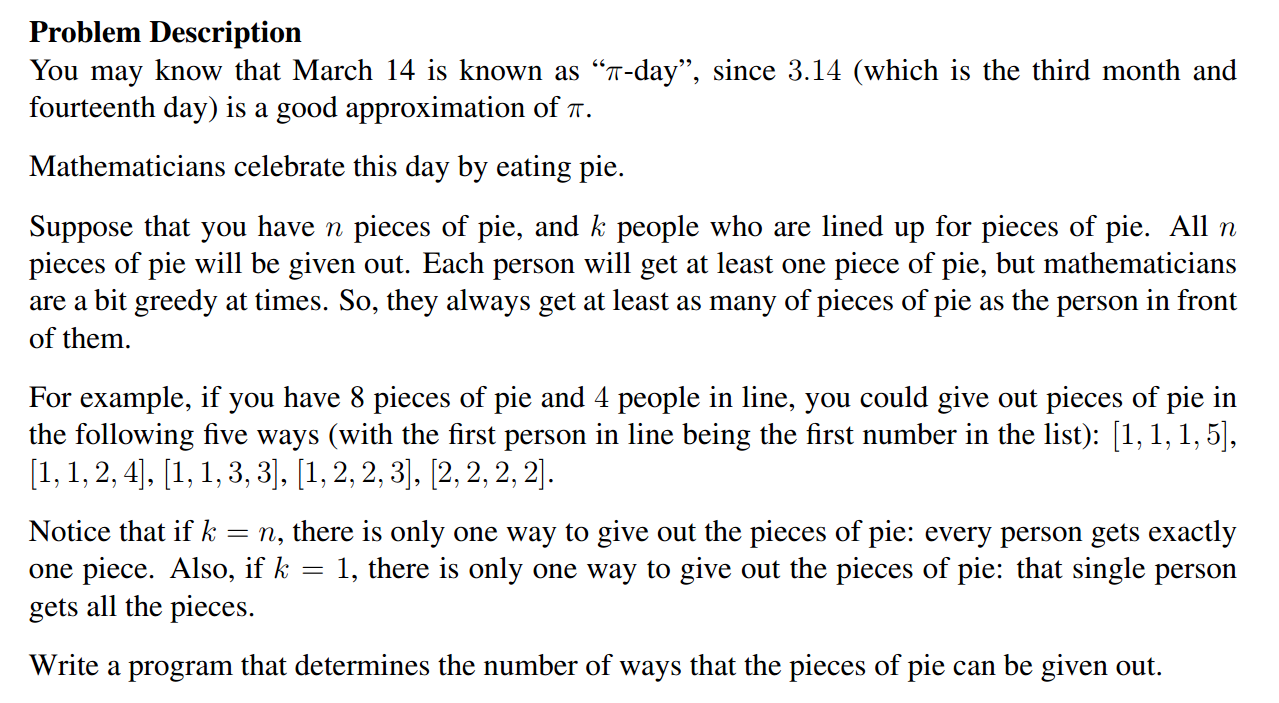

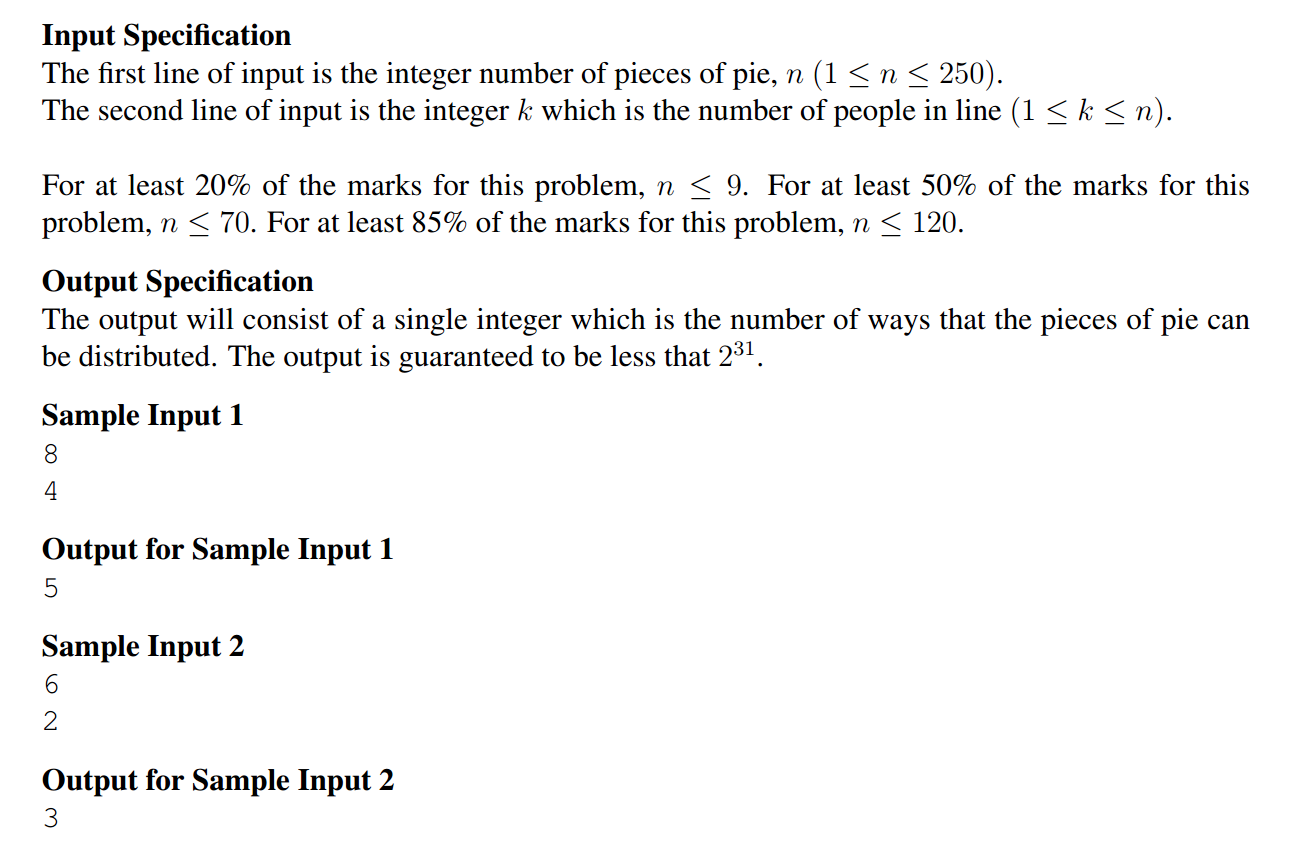

### 9.5.1 带备忘录的递归 

In [36]:
npi = int(input())
npe = int(input())

rec = {}
def pydy(pi, pe, first):
    if pi < pe:
        return 0
    if pe == 1 or pi == pe:
        return 1
    if (pi, pe, first) in rec:
        return rec[(pi, pe, first)]

    count = 0
    for i in range(first, (pi//pe)+1):
        count = count + pydy(pi-i, pe-1, i)
    
    rec[(pi, pe, first)] = count

    return count

print(pydy(npi, npe, 1))

8
4
5


### 9.5.2 动态规划（DP）

In [9]:
n = int(input())
k = int(input())

# initial a DP table
dp_table = [[0 for i in range(k+1)] for i in range(n+1)]

# initial boundary values and loop up all possible situations
for i in range(1, n+1):
    for j in range(1, min(i, k)+1):
        if j == 1:
            dp_table[i][j] = 1
        elif i == j:
            dp_table[i][j] = 1
        elif i < j:
            dp_table[i][j] = 0
        else:
            dp_table[i][j] = dp_table[i-1][j-1] + dp_table[i-j][j]

print(dp_table[n][k])  

8
4
5
